# Import the libraries

In [73]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [74]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Understanding the data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [76]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [77]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
df.shape

(1599, 12)

In [79]:
df.duplicated().sum()

240

In [80]:
df = df.drop_duplicates()

In [81]:
df.shape

(1359, 12)

# Visualising the Data

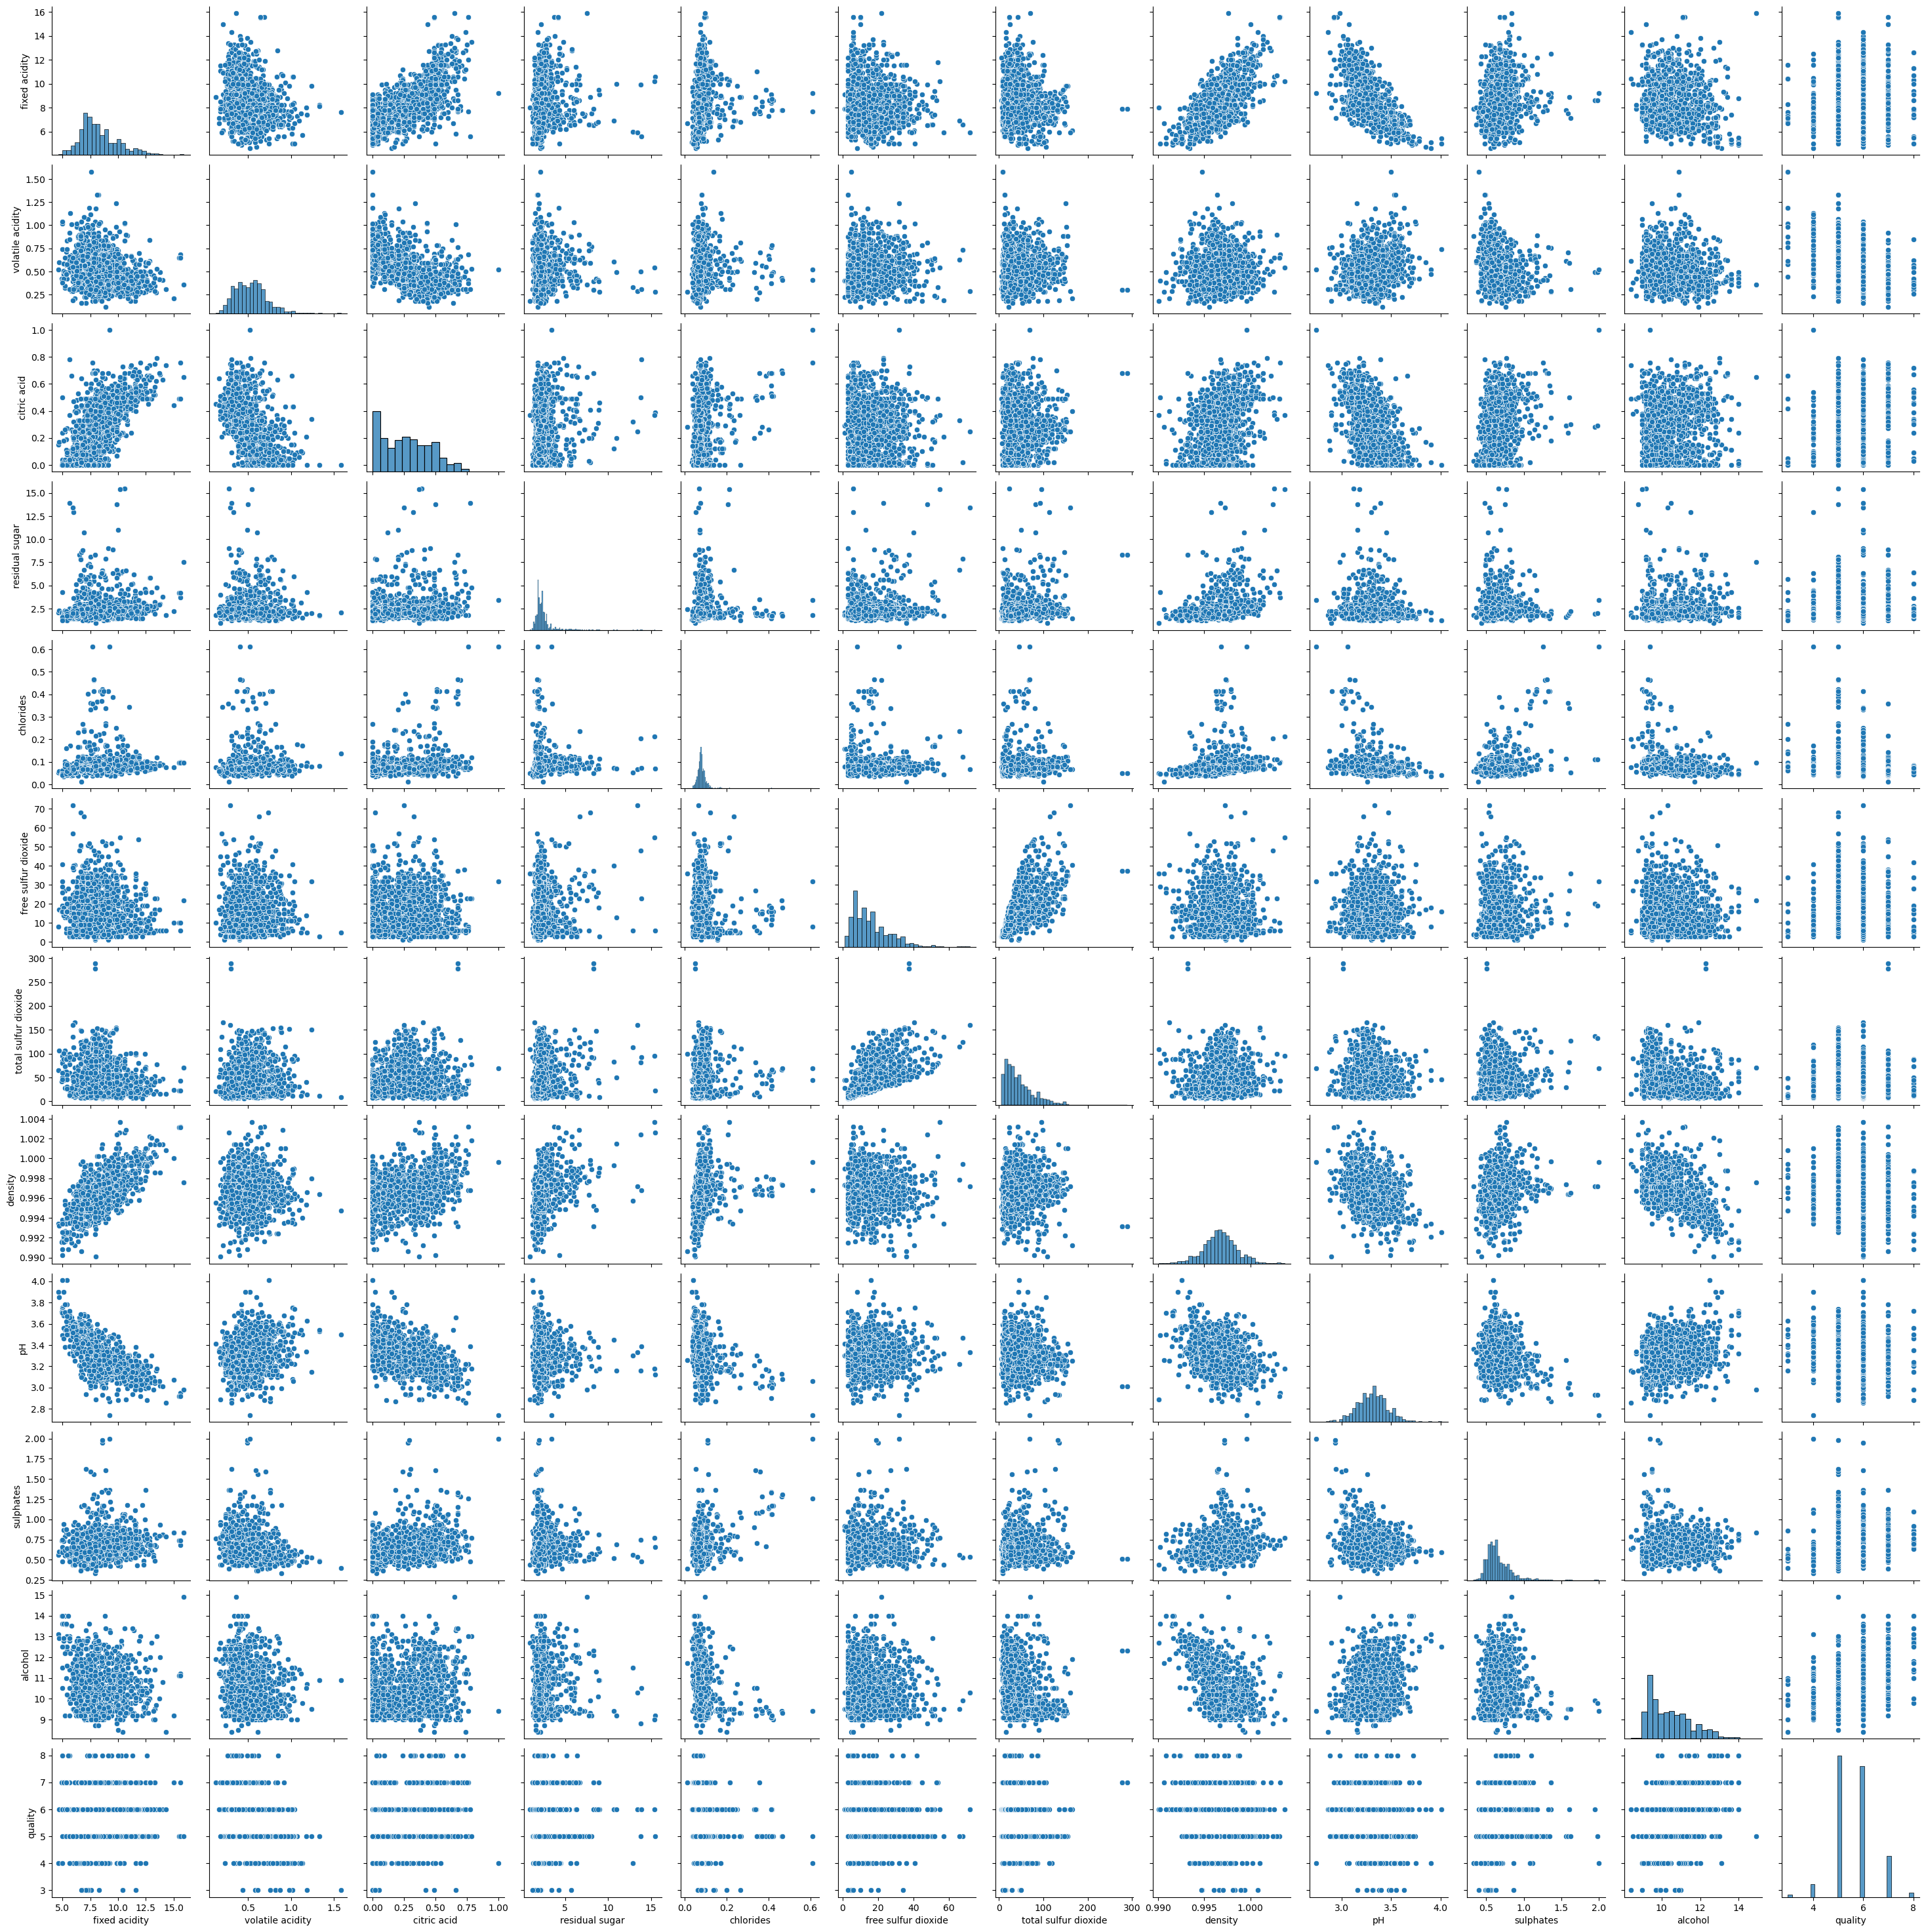

In [82]:
sns.pairplot(df) 
plt.show()

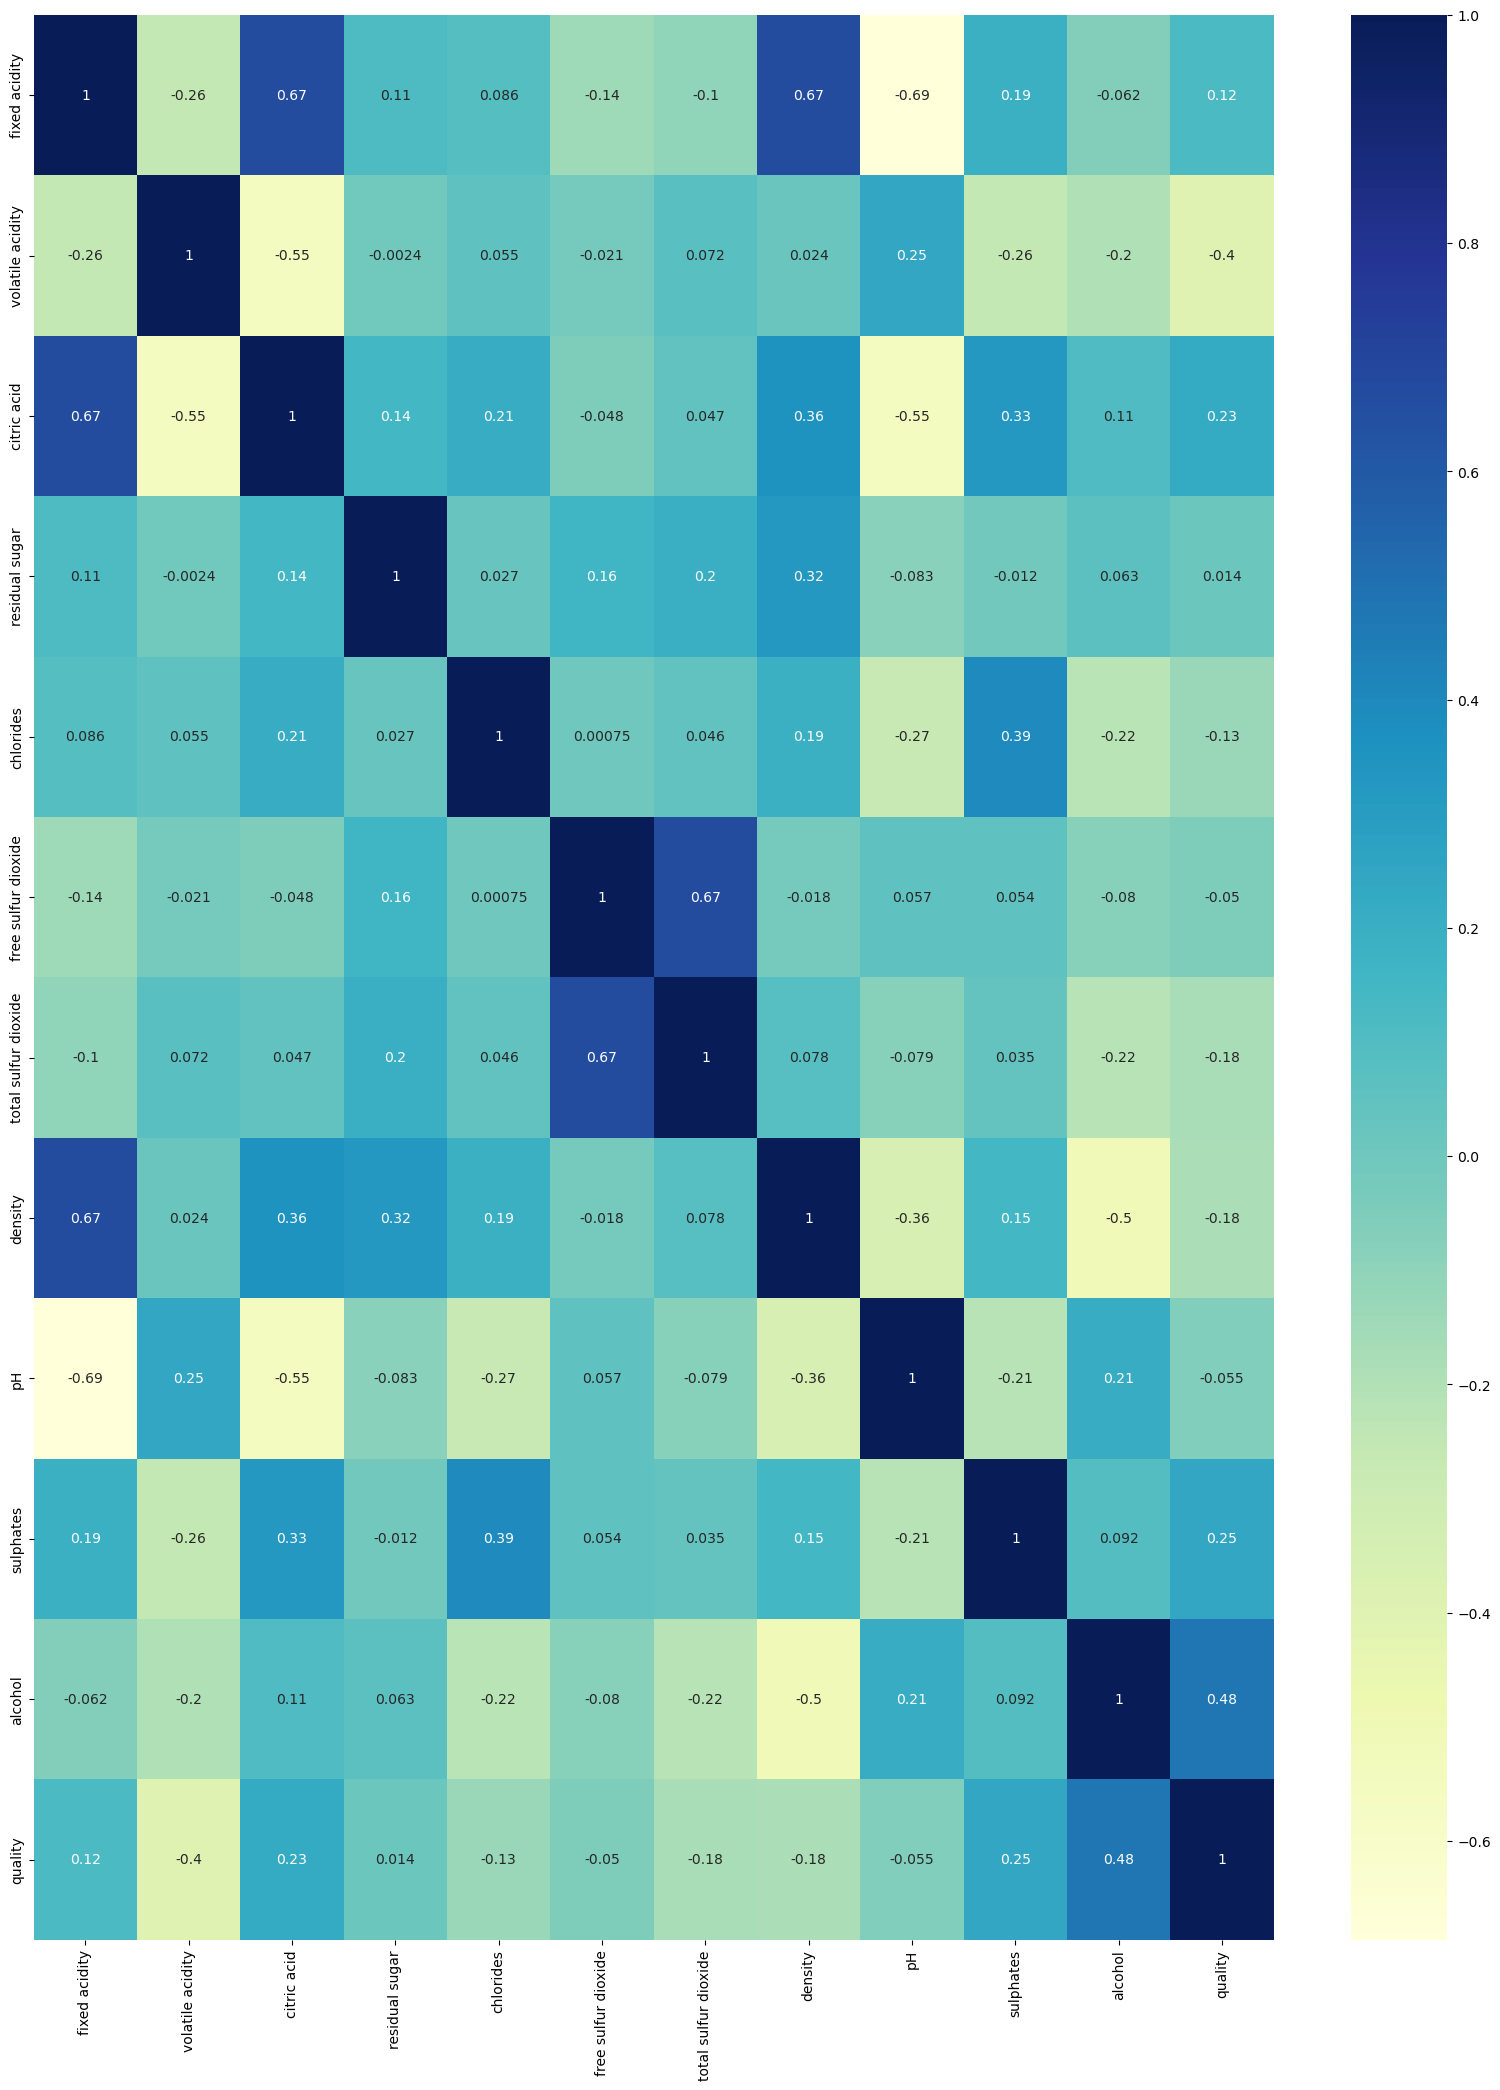

In [83]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

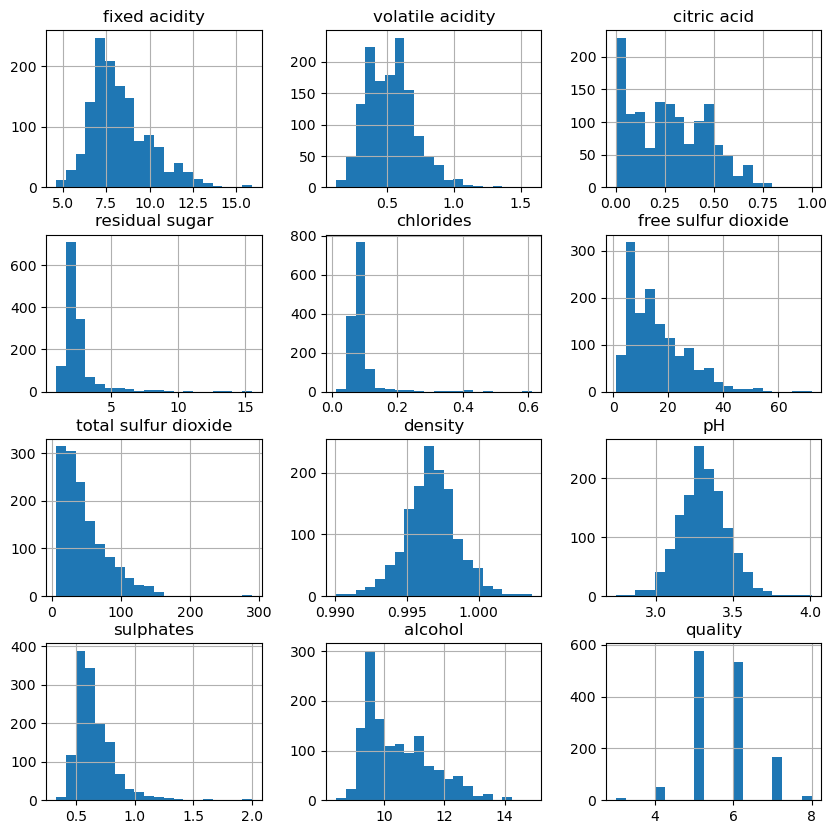

In [84]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

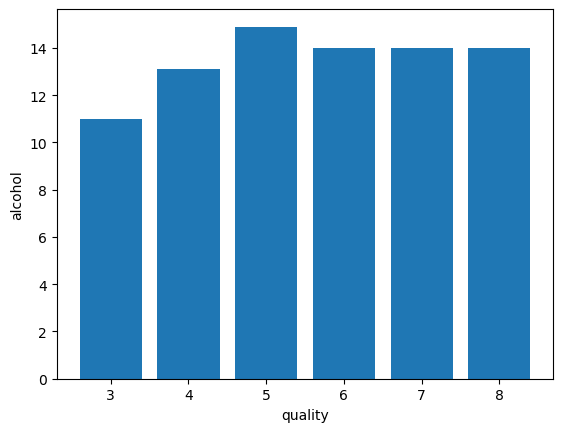

In [85]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# Split data into Training and Testing data

In [86]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [87]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [88]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (1087, 11)
y train shape: (1087,)


In [91]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1152,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
1038,8.7,0.41,0.41,6.2,0.078,25.0,42.0,0.99530,3.24,0.77,12.6
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4
1160,10.6,0.36,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1
804,8.4,0.52,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9


In [92]:
y_train.head()

1152    5
1038    7
1322    5
1160    7
804     6
Name: quality, dtype: int64

# Scaling Training Data: MinMaxScaler

In [93]:
from sklearn.preprocessing import StandardScaler  
scaler = MinMaxScaler()

In [94]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
#y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [95]:
X_train

array([[-0.00365989,  0.36399875, -0.09329592, ..., -1.05347299,
        -0.75743133, -0.58127457],
       [ 0.23035763, -0.6731353 ,  0.72331333, ..., -0.46306704,
         0.72104743,  2.02959284],
       [ 0.46437514, -1.05523732,  0.77435141, ..., -0.85667101,
        -0.63422477,  0.91064967],
       ...,
       [ 1.10792331,  0.03648273,  0.51916102, ..., -0.85667101,
         0.72104743, -1.32723668],
       [-0.58870368,  0.74610077, -1.11405748, ...,  0.58654354,
        -0.14139852, -0.30153877],
       [-0.70571243,  0.41858475, -1.26717171, ...,  1.11134883,
        -0.32620836, -0.67451983]])

# Building a linear model

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.coef_

array([ 0.04714756, -0.19445375, -0.06881725,  0.04932339, -0.08897258,
        0.01126293, -0.08889753, -0.03490419, -0.07517847,  0.16494271,
        0.33291046])

In [98]:
lr.intercept_

5.618215271389144

In [99]:
lr.score(X_train,y_train)

0.39290462812457216

In [100]:
y_pred = lr.predict(X_test)
y_pred

array([6.13823535, 5.17254336, 5.30959075, 6.0445387 , 6.29581357,
       5.73370083, 5.83540771, 5.76525745, 5.09235911, 6.03273647,
       5.48425464, 6.39133188, 5.52160365, 4.86354967, 6.71679507,
       5.60683769, 6.17974604, 5.83652073, 5.3464376 , 5.69285579,
       5.81384635, 4.83340374, 5.96625654, 6.35176362, 5.54894989,
       7.72390461, 6.48556546, 6.00772255, 5.09468497, 4.59196   ,
       5.19792212, 4.8559623 , 5.21493098, 5.5973994 , 6.66360351,
       6.1874226 , 5.2196408 , 6.29136508, 5.72822204, 6.70258737,
       5.47160608, 5.6491996 , 6.34041426, 6.21019868, 5.79087309,
       5.83185403, 5.27278692, 5.31725742, 5.50928464, 5.52980794,
       6.44983122, 5.13809383, 6.11487175, 5.66576515, 6.20929222,
       6.43621715, 5.29906978, 4.94087749, 5.61003108, 6.54862727,
       5.20496193, 5.6830414 , 6.45249368, 5.00428291, 5.37561306,
       5.06926158, 5.06482876, 5.67519588, 5.15166747, 5.18154491,
       5.27041241, 6.27246858, 5.13357229, 5.31329045, 6.24822

In [101]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.2248989646627627

In [103]:
y_test = y_test.values.reshape(-1,1)

In [107]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted': y_pred.flatten().round(0)})
dframe

,actual,Predicted
0,7,6.0
1,5,5.0
2,6,5.0
3,7,6.0
4,6,6.0
...,...,...
267,6,5.0
268,5,6.0
269,5,4.0
270,5,5.0


# Model Evaluation

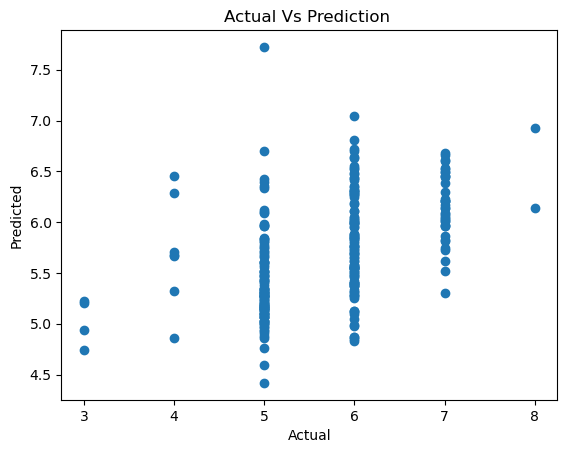

In [108]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title('Actual Vs Prediction ')
plt.xlabel('Actual')                         
plt.ylabel('Predicted')
plt.show()

# Save the model

In [114]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(lr, files)